Чигладзе Давид.ДЗ по логистической регрессии.Предсказывание удовлетворенности
перелетом (удовлетворен или нет).

сначала надо импортировать все библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

теперь импортируем и изучим датасеты.

выведем сначала тренирочочный датасет

In [4]:
train_data = pd.read_csv("/content/test.csv")
train_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


проверим на пропуски данных

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [6]:
train_data.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


а сейчас тестовый

In [7]:
test_data = pd.read_csv("/content/train.csv")
test_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


тут тоже проверим на пропуски данных

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
test_data.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


теперь заменим пропушенные значения в обоих датасетах на средннее по столбитку сначала первый.

In [10]:
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Departure Delay in Minutes'])
train_data.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


теперь второй датасет

In [11]:
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(test_data['Departure Delay in Minutes'])
test_data.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Удаляем все столбцы где аргументы нечисловые  и бесполезные столбцы которые не несут смысловой нагрузки тоже

сначала первый датасет

In [12]:
train_data = train_data.drop(['Unnamed: 0', 'id'], axis = 1)

In [13]:
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


теперь второй

In [14]:
test_data = test_data.drop(['Unnamed: 0', 'id'], axis = 1)
test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


смотрим сколько уникальных аргументов в стобике satisfaction

первый датасет

In [15]:
train_data['satisfaction'].nunique()

2

второй

In [16]:
test_data['satisfaction'].nunique()

2

заменим значения в satisfaction в обоих датасетах на 1 и 0 соотвестсвенно

первый датасет

In [17]:
train_data["satisfaction"] = train_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})

<ipython-input-17-ba299c8c9fc5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["satisfaction"] = train_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})


In [18]:
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


второй датасет

In [19]:
test_data["satisfaction"] = test_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})
test_data

<ipython-input-19-e69b4c1bb461>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["satisfaction"] = test_data["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


нарисуем матрицу кареляции и увиди от каких признаков больше всего корелирует наш y

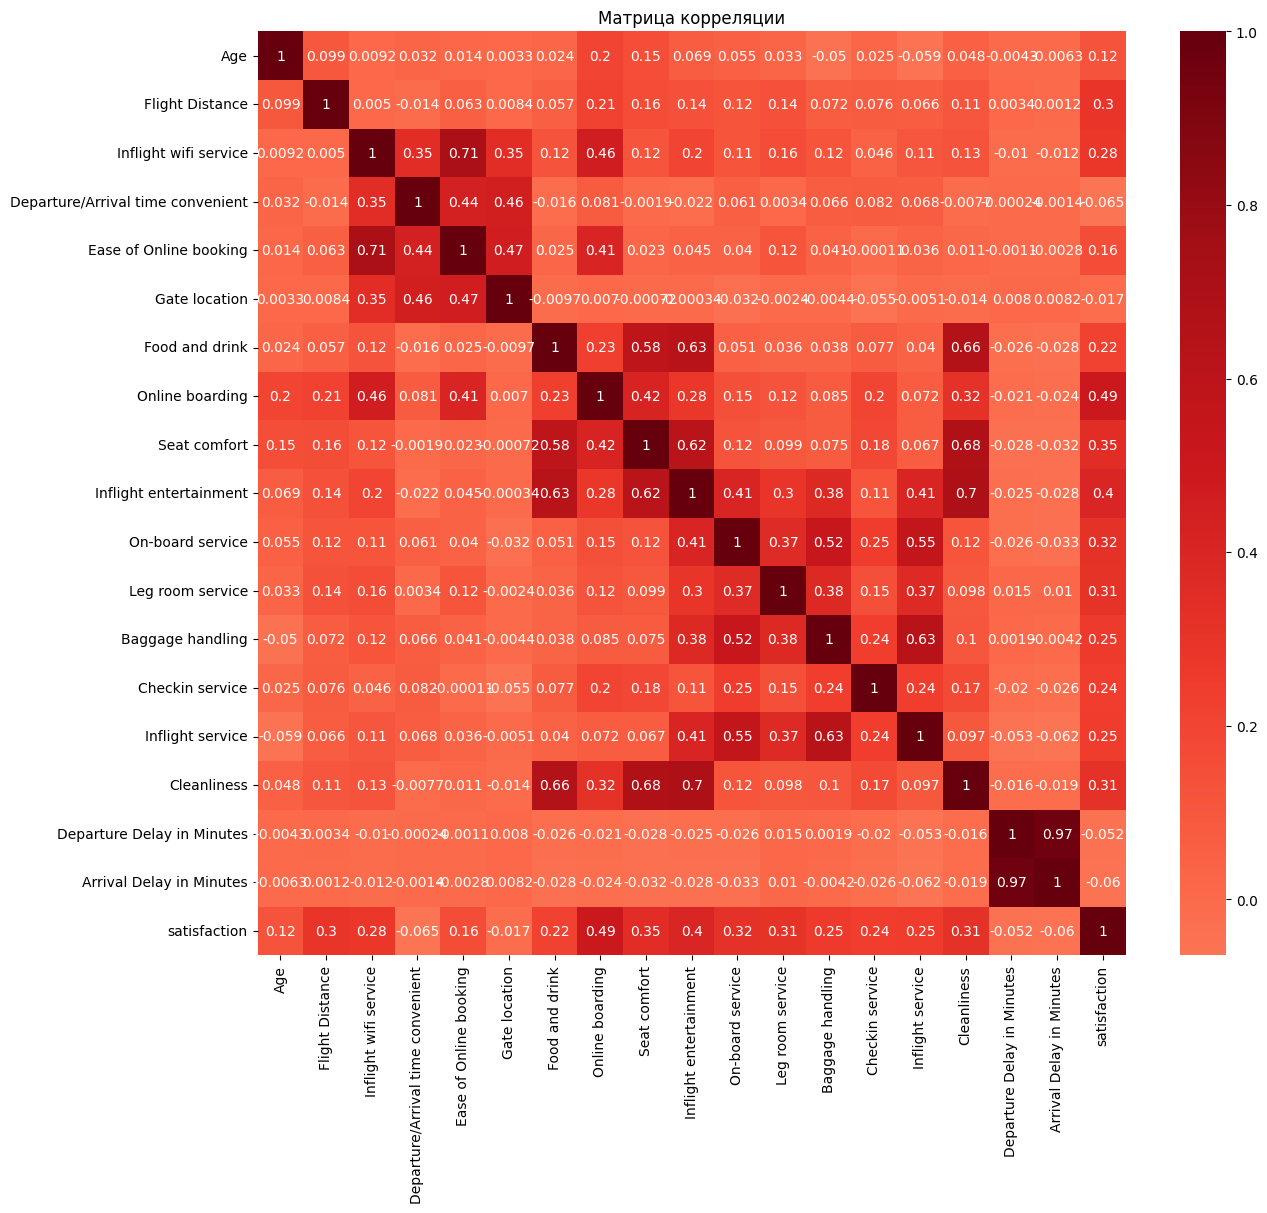

In [20]:
plt.figure(figsize=(14,12))
correlation = train_data.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='Reds', center=0, annot=True)
plt.title("Матрица корреляции")
plt.show()

заменяем с помошью гетдамис столбики с нечисловыми аргументами, снчала первы датасет

In [21]:
train_data = pd.get_dummies(train_data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
train_data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,1,True,False,True,False,True,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,1,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,1,False,True,True,False,True,False,True,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,1,True,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,0,False,True,False,True,True,False,True,False,False
25972,23,646,4,4,4,4,4,4,4,4,...,1,False,True,True,False,True,False,True,False,False
25973,17,828,2,5,1,5,2,1,2,2,...,0,True,False,True,False,False,True,False,True,False
25974,14,1127,3,3,3,3,4,4,4,4,...,1,False,True,True,False,True,False,True,False,False


второй датасет

In [22]:
test_data = pd.get_dummies(test_data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
test_data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,False,True,True,False,False,True,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,0,False,True,False,True,True,False,True,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,1,True,False,True,False,True,False,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,0,True,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,1,False,True,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,0,True,False,False,True,True,False,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,1,False,True,True,False,True,False,True,False,False
103901,30,1995,1,1,1,3,4,1,5,4,...,0,False,True,False,True,True,False,True,False,False
103902,22,1000,1,1,1,5,1,1,1,1,...,0,True,False,False,True,True,False,False,True,False


рисуем вторую матрицу кареляции сновым датасетом

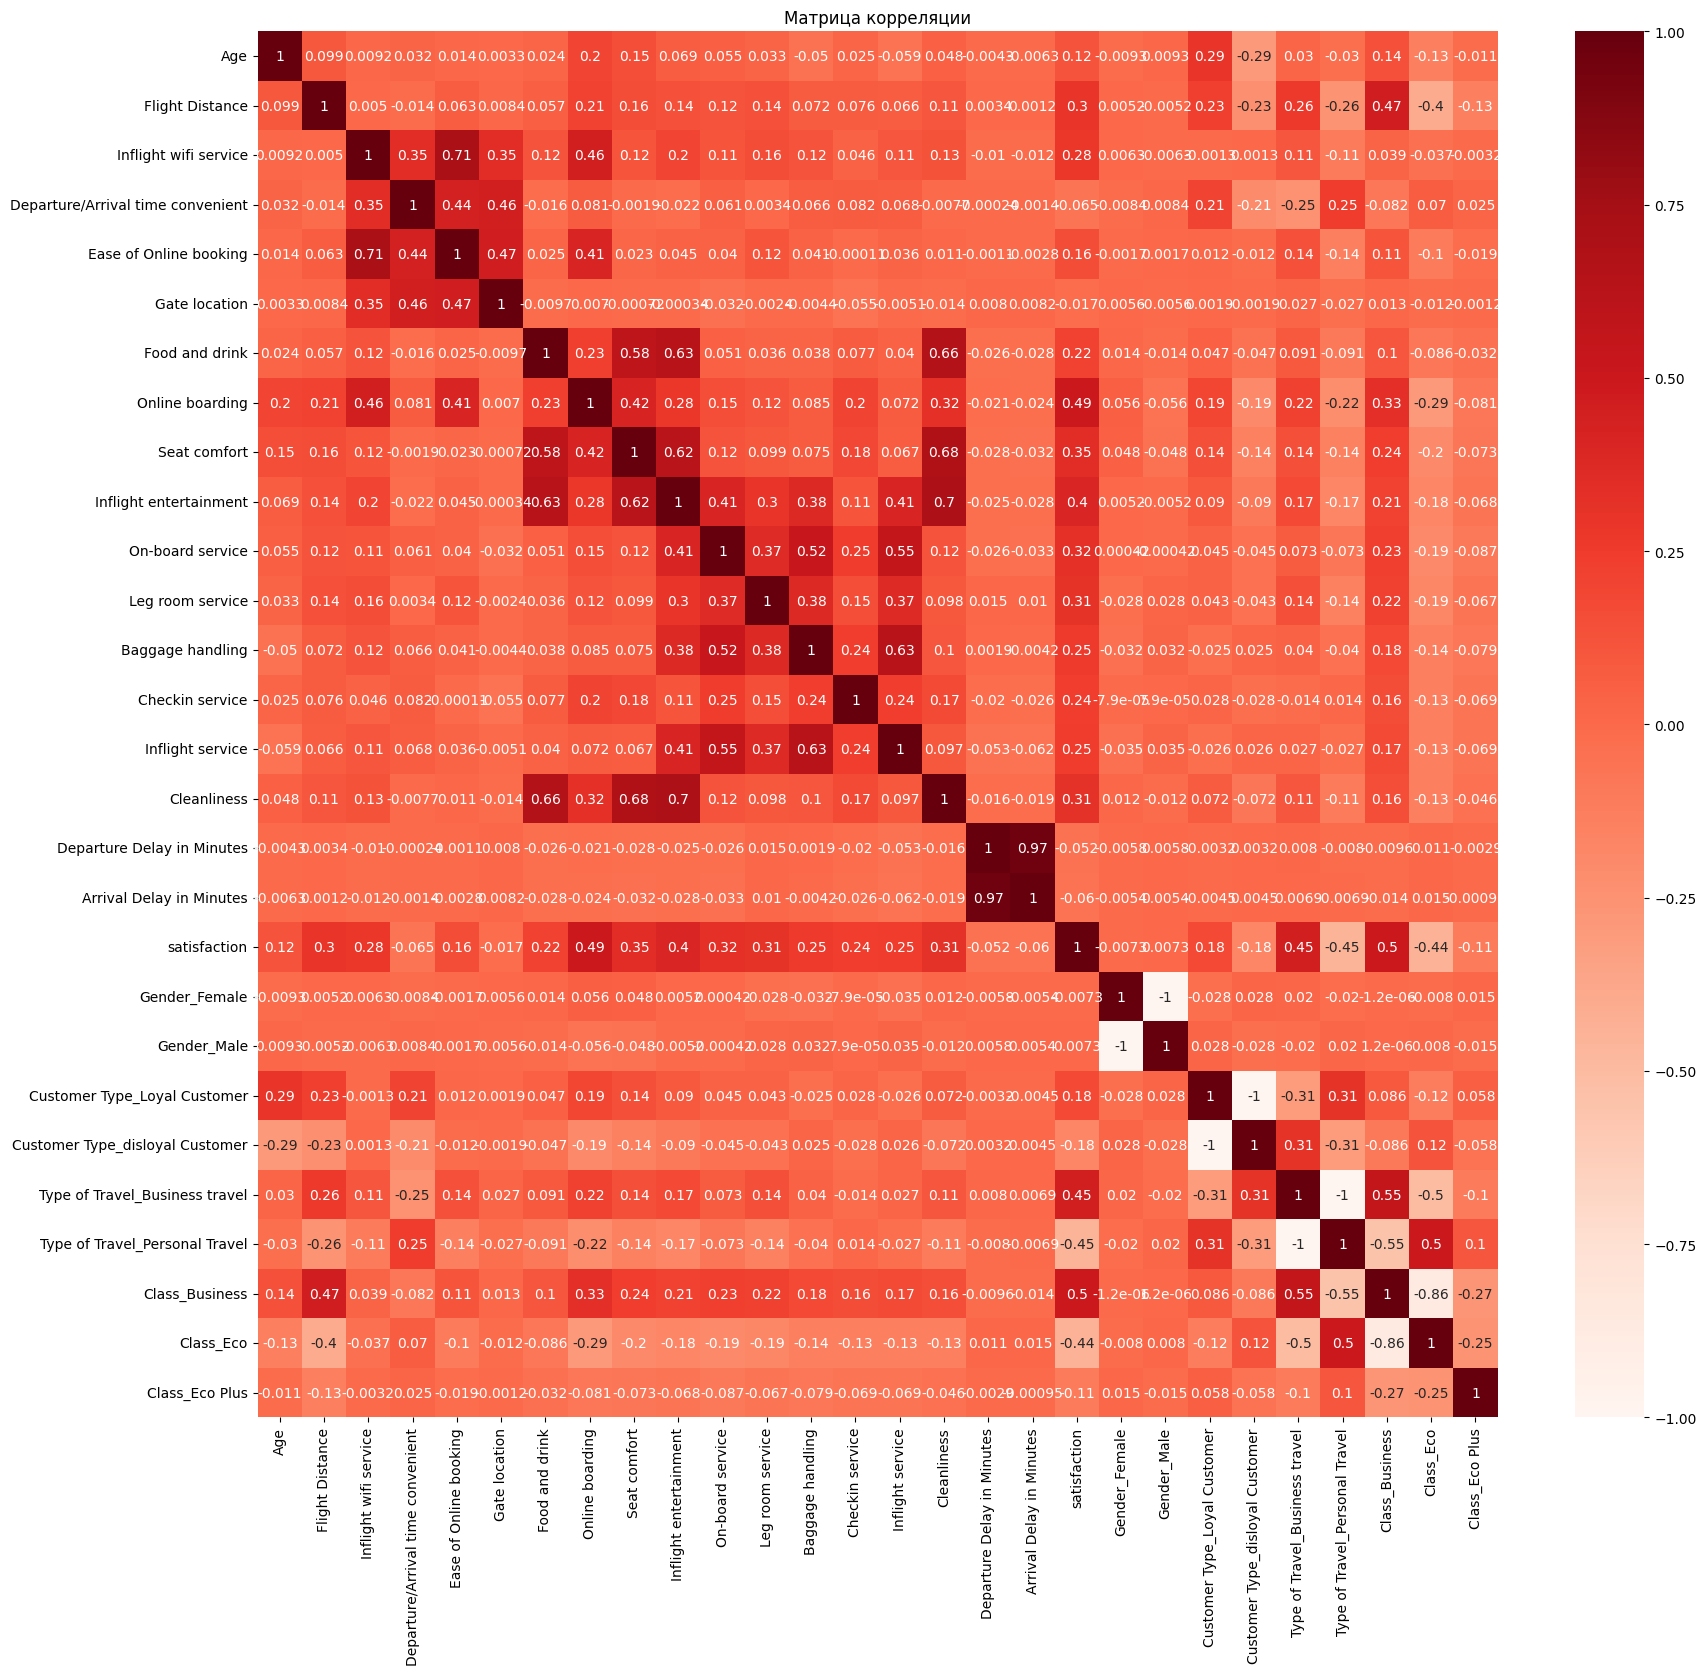

In [23]:
plt.figure(figsize=(20,18))
correlation = train_data.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='Reds', center=0, annot=True)
plt.title("Матрица корреляции")
plt.show()

Обучаем модель

In [24]:
X = pd.concat([train_data.loc[:, 'Age':'Inflight wifi service' ], train_data.loc[:, 'Ease of Online booking'], train_data.loc[:, 'Food and drink':'Cleanliness' ], train_data.loc[:, 'Customer Type_Loyal Customer':'Class_Eco' ] ], axis=1)
y = train_data['satisfaction']
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

тестируем

In [25]:
answers_pred = model.predict(pd.concat([test_data.loc[:, 'Age':'Inflight wifi service' ], test_data.loc[:, 'Ease of Online booking'], test_data.loc[:, 'Food and drink':'Cleanliness' ], test_data.loc[:, 'Customer Type_Loyal Customer':'Class_Eco' ] ], axis=1))

важность каждого признака

In [26]:
model.coef_

array([[-2.85910126e-02, -1.17344269e-04,  5.67477162e-01,
        -4.53580080e-01, -2.60232030e-01,  4.91195118e-01,
        -2.39815057e-01,  6.97256653e-01,  8.27210320e-02,
         3.92488832e-02, -1.58228284e-01,  2.62543986e-01,
        -2.09889329e-01, -3.62018895e-02,  3.39534836e-02,
        -1.04015227e+00,  4.46578212e-01, -1.45277699e+00,
         6.85443533e-01, -1.31352118e+00]])

In [27]:
model.intercept_

array([-1.00665881])

смотрим точность нашего алгоритма

In [28]:
print(accuracy_score(test_data['satisfaction'], answers_pred))

0.839621188789652


In [29]:
recall_score(test_data['satisfaction'], answers_pred)

0.8310272071071627

In [30]:
precision_score(test_data['satisfaction'], answers_pred)

0.8051341639231382

In [31]:
f1_score(test_data['satisfaction'], answers_pred)

0.8178758005639467

создаем confusion matrix

In [32]:
y1 = test_data['satisfaction']
confusion_matrix(y1, answers_pred)

array([[49823,  9056],
       [ 7608, 37417]])

In [33]:
tn, fp, fn, tp = confusion_matrix(y1, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 49823
FP: 9056
FN: 7608
TP: 37417


смотрим соотношение данных

In [34]:
df_y = pd.DataFrame(y1)
df_y.value_counts()

,count
satisfaction,
0,58879
1,45025
